In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# List of attack types
# attack_types = ["Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator","PortScan", "SSH-Patator"]
attack_types = ["Bot", "DDoS", "DoS GoldenEye"]
benign_type = "BENIGN"

# Initialize an empty list to store results as dictionaries
results = []

# Loop through each attack type
for attack_type in attack_types:
    # Read the feature importance file
    importance_file = f"{attack_type}_importance.csv"
    importance_data = pd.read_csv(importance_file)
    
    # Select the first 4 features
    selected_features = importance_data['Feature'][:3].tolist()
    
    # Read the data file
    data_file = "/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/ATTACK_DATA/" +f"{attack_type}_vs_{benign_type}.csv"
    data = pd.read_csv(data_file)
    # Strip spaces from column names right after loading
    data.columns = data.columns.str.strip()
    # Select the selected features and the target column
    selected_data = data[selected_features + ['Label']]
    
    # Split the data into features (X) and target (y)
    X = selected_data[selected_features]
    y = selected_data['Label']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Train Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    
    # Train Quadratic Discriminant Analysis
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    
    # Train Multi-Layer Perceptron
    mlp_model = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
    mlp_model.fit(X_train, y_train)
    
    # Predictions
    nb_preds = nb_model.predict(X_test)
    qda_preds = qda_model.predict(X_test)
    mlp_preds = mlp_model.predict(X_test)
    
    # Calculate accuracies
    nb_accuracy = accuracy_score(y_test, nb_preds)
    qda_accuracy = accuracy_score(y_test, qda_preds)
    mlp_accuracy = accuracy_score(y_test, mlp_preds)
    
    # Store the results as a dictionary
    result_dict = {
        'Attack Type': attack_type,
        'Naive Bayes Accuracy': nb_accuracy,
        'QDA Accuracy': qda_accuracy,
        'MLP Accuracy': mlp_accuracy
    }
    
    # Append the dictionary to the results list
    results.append(result_dict)

# Create a Pandas DataFrame from the results list 
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


     Attack Type  Naive Bayes Accuracy  QDA Accuracy  MLP Accuracy
0            Bot              0.998870      0.996972      0.999462
1           DDoS              0.974113      0.981548      0.998230
2  DoS GoldenEye              0.987561      0.984218      0.999013


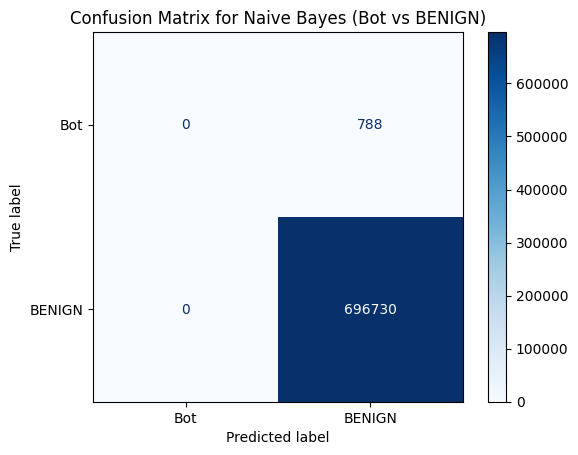

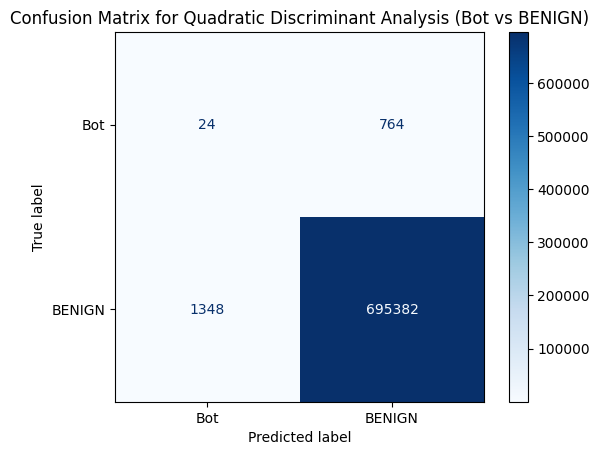

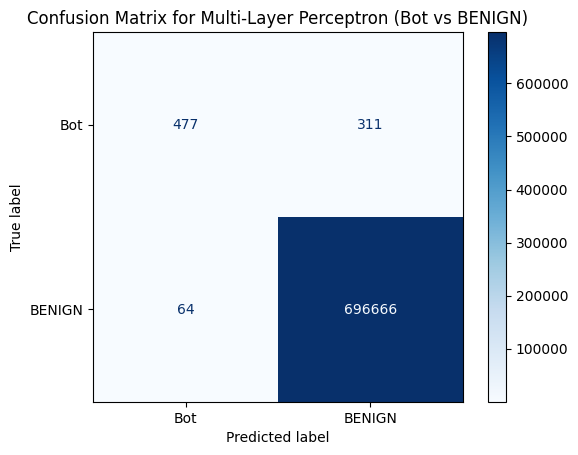

/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


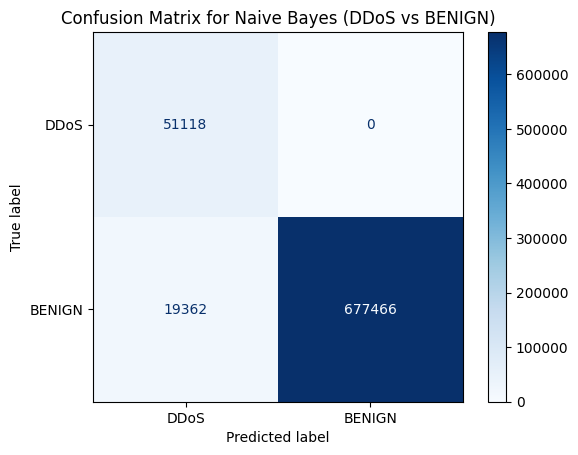

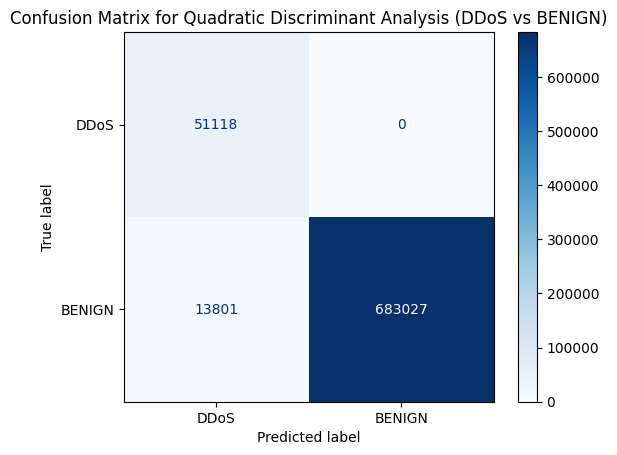

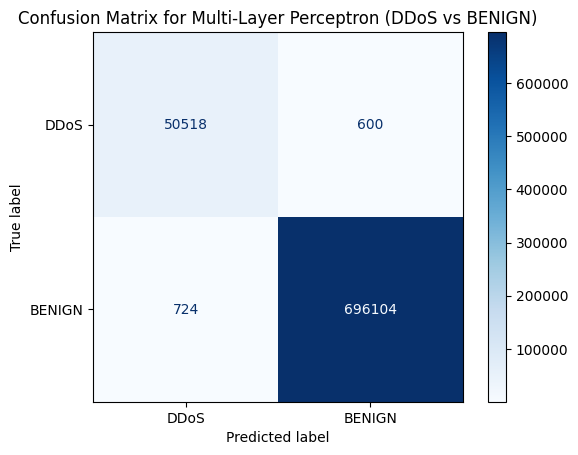

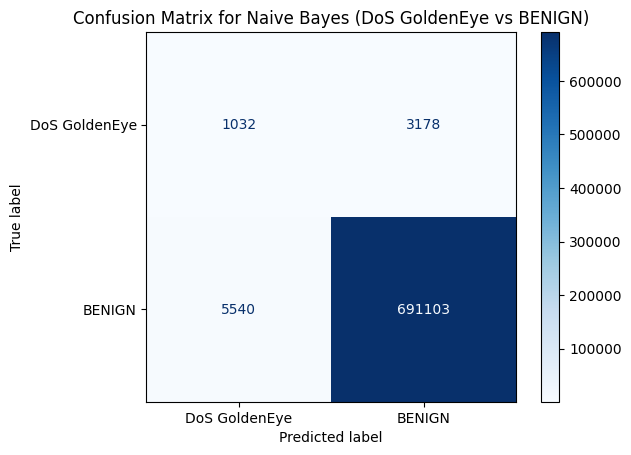

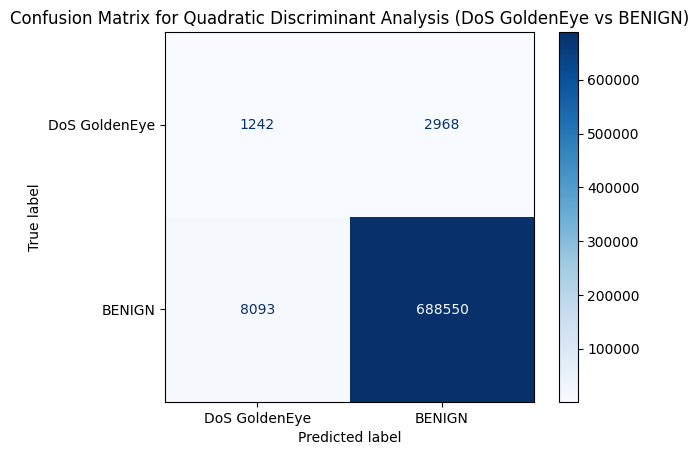

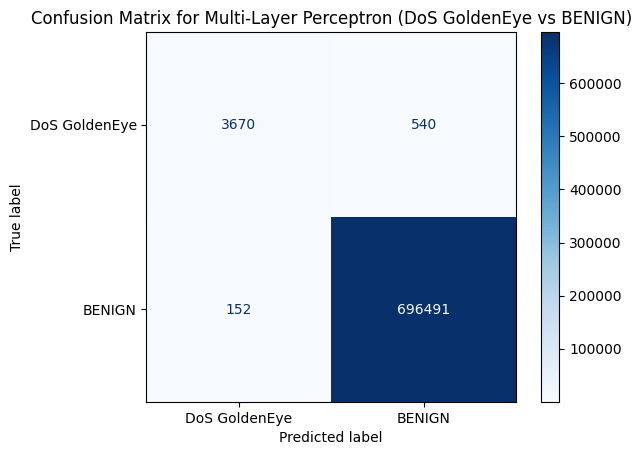

     Attack Type  Naive Bayes Accuracy  QDA Accuracy  MLP Accuracy
0            Bot              0.998870      0.996972      0.999462
1           DDoS              0.974113      0.981548      0.998230
2  DoS GoldenEye              0.987561      0.984218      0.999013


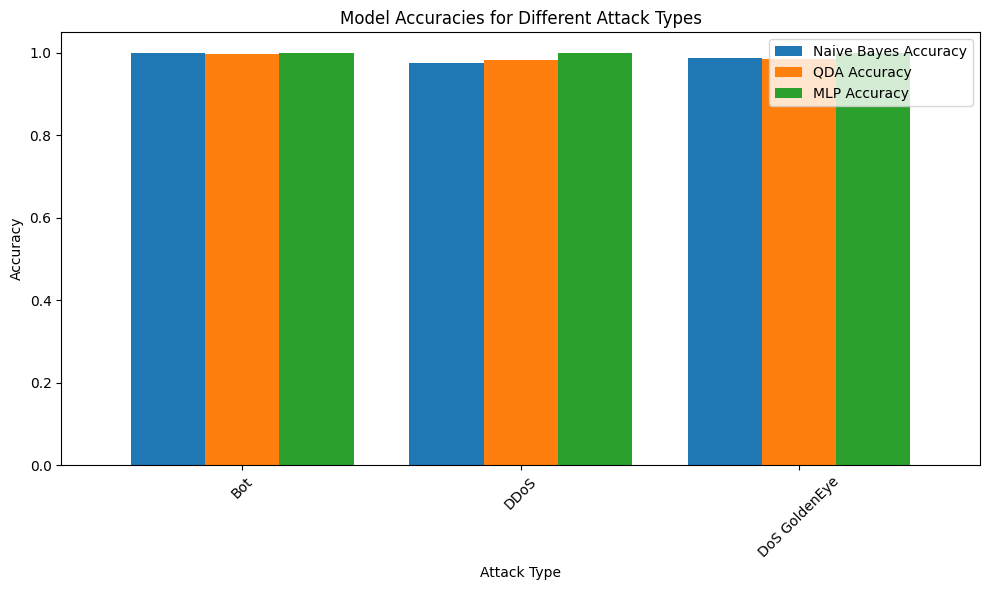

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# List of attack types
attack_types = ["Bot", "DDoS", "DoS GoldenEye"]
benign_type = "BENIGN"

# Initialize an empty list to store results as dictionaries
results = []

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_preds, model_name, attack_type):
    cm = confusion_matrix(y_test, y_preds, labels=[attack_type, benign_type])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[attack_type, benign_type])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for {model_name} ({attack_type} vs BENIGN)")
    plt.show()

# Loop through each attack type
for attack_type in attack_types:
    # Read the feature importance file
    importance_file = f"{attack_type}_importance.csv"
    importance_data = pd.read_csv(importance_file)
    
    # Select the first 4 features
    selected_features = importance_data['Feature'][:3].tolist()
    
    # Read the data file
    data_file = f"/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/ATTACK_DATA/{attack_type}_vs_{benign_type}.csv"
    data = pd.read_csv(data_file)
    data.columns = data.columns.str.strip()  # Strip spaces from column names
    
    # Select the selected features and the target column
    selected_data = data[selected_features + ['Label']]
    
    # Split the data into features (X) and target (y)
    X = selected_data[selected_features]
    y = selected_data['Label']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Train Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    
    # Train Quadratic Discriminant Analysis
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    qda_preds = qda_model.predict(X_test)
    
    # Train Multi-Layer Perceptron
    mlp_model = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
    mlp_model.fit(X_train, y_train)
    mlp_preds = mlp_model.predict(X_test)
    
    # Calculate accuracies
    nb_accuracy = accuracy_score(y_test, nb_preds)
    qda_accuracy = accuracy_score(y_test, qda_preds)
    mlp_accuracy = accuracy_score(y_test, mlp_preds)
    
    # Store the results as a dictionary
    result_dict = {
        'Attack Type': attack_type,
        'Naive Bayes Accuracy': nb_accuracy,
        'QDA Accuracy': qda_accuracy,
        'MLP Accuracy': mlp_accuracy
    }
    results.append(result_dict)
    
    # Plot confusion matrices
    plot_confusion_matrix(y_test, nb_preds, "Naive Bayes", attack_type)
    plot_confusion_matrix(y_test, qda_preds, "Quadratic Discriminant Analysis", attack_type)
    plot_confusion_matrix(y_test, mlp_preds, "Multi-Layer Perceptron", attack_type)

# Create a Pandas DataFrame from the results list 
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Plot bar chart for accuracies
results_df.plot(x='Attack Type', kind='bar', figsize=(10, 6), width=0.8)
plt.title("Model Accuracies for Different Attack Types")
plt.ylabel("Accuracy")
plt.xlabel("Attack Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function for MAP Estimation
def map_estimation(X_train, y_train, X_test):
    class_labels = np.unique(y_train)
    predictions = []
    for x in X_test:
        class_probs = {}
        for cls in class_labels:
            prior = np.sum(y_train == cls) / len(y_train)
            cls_indices = np.where(y_train == cls)
            cls_samples = X_train[cls_indices]
            mean = np.mean(cls_samples, axis=0)
            cov = np.cov(cls_samples, rowvar=False)
            cov_inv = np.linalg.inv(cov + np.eye(cov.shape[0]) * 1e-6)
            det = np.linalg.det(cov + np.eye(cov.shape[0]) * 1e-6)
            likelihood = (1 / np.sqrt((2 * np.pi) ** len(x) * det)) * np.exp(-0.5 * np.dot(np.dot((x - mean).T, cov_inv), (x - mean)))
            class_probs[cls] = likelihood * prior
        predictions.append(max(class_probs, key=class_probs.get))
    return np.array(predictions)

# List of attack types
attack_types = ["Bot", "DDoS", "DoS GoldenEye"]
benign_type = "BENIGN"

results = []

for attack_type in attack_types:
    try:
        # Read the feature importance file
        importance_file = f"{attack_type}_importance.csv"
        importance_data = pd.read_csv(importance_file)
        
        # Select the first 4 features
        selected_features = importance_data['Feature'][:4].tolist()
        
        # Read the data file
        data_file = "/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/ATTACK_DATA/" + f"{attack_type}_vs_{benign_type}.csv"
        data = pd.read_csv(data_file)
        # Strip spaces from column names right after loading
        data.columns = data.columns.str.strip()
        # Select the features and the target column
        selected_data = data[selected_features + ['Label']]
        X = selected_data[selected_features].values
        y = selected_data['Label'].apply(lambda x: 1 if x != benign_type else 0).values
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Models to test (removed QDA, Naive Bayes, MLP)
        models = {
            'SVM (RBF Kernel)': SVC(kernel='rbf', random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Kernel PCA + SVM': None,
            'MAP': None
        }

        # Kernel PCA + SVM
        kpca = KernelPCA(n_components=3, kernel='rbf', random_state=42)
        kpca_X_train = kpca.fit_transform(X_train)
        kpca_X_test = kpca.transform(X_test)
        svm_kpca = SVC(kernel='rbf', random_state=42)
        svm_kpca.fit(kpca_X_train, y_train)
        models['Kernel PCA + SVM'] = svm_kpca

        # MAP Model
        map_preds = map_estimation(X_train, y_train, X_test)
        map_accuracy = accuracy_score(y_test, map_preds)
        results.append({'Attack Type': attack_type, 'Model': 'MAP', 'Accuracy': map_accuracy})
        
        # Evaluate other models
        for model_name, model in models.items():
            if model_name in ['Kernel PCA + SVM', 'MAP']:
                continue  # Skip special cases
            
            try:
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                accuracy = accuracy_score(y_test, preds)
                results.append({'Attack Type': attack_type, 'Model': model_name, 'Accuracy': accuracy})
            except Exception as e:
                print(f"Error while training {model_name} for {attack_type}: {e}")
    
    except Exception as e:
        print(f"Error with {attack_type}: {e}")

# Create a Pandas DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results
print("\nOverall Model Results:")
print(results_df)

# Visual Comparative Analysis
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x="Attack Type", y="Accuracy", hue="Model")
plt.title("Comparative Model Accuracy Across Attack Types")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate average accuracy for each model
average_accuracy = results_df.groupby("Model")["Accuracy"].mean().reset_index()
average_accuracy = average_accuracy.sort_values(by="Accuracy", ascending=False)

# Print average accuracies
print("\nAverage Model Accuracies:")
print(average_accuracy)

# Visualize average accuracies
plt.figure(figsize=(8, 5))
sns.barplot(data=average_accuracy, x="Model", y="Accuracy", palette="viridis")
plt.title("Average Accuracy of Each Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

: 